# Example: COBAHH

https://brian2.readthedocs.io/en/stable/examples/COBAHH.html

In [1]:
import sys
#sys.path.append('/home/jovyan/brian2lava')
# sys.path.append('/home/carlo/Entwicklung/Python/brian2lava')
sys.path.append('/home/francesco/Developing/B2L/brian2lava')

In [2]:
from brian2 import *

# Import Brian2Lava
import brian2lava

# Set device
set_device('lava', hardware='CPU', debug=True)

WARNING    neurongroup's variable 'h' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]
WARNING    neurongroup's variable 'n' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]
WARNING    neurongroup's variable 'm' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]
WARNING    neurongroup's variable 'v' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]


Starting simulation at t=0 s for duration 0.01 s
0.01 s (100%) simulated in < 1s


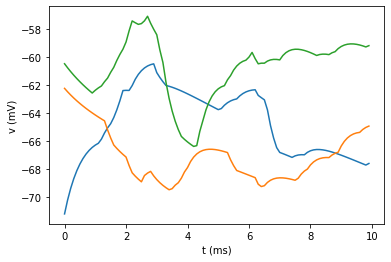

In [3]:
# Parameters
area = 20000*umetre**2
Cm = (1*ufarad*cm**-2) * area
gl = (5e-5*siemens*cm**-2) * area

El = -60*mV
EK = -90*mV
ENa = 50*mV
g_na = (100*msiemens*cm**-2) * area
g_kd = (30*msiemens*cm**-2) * area
VT = -63*mV
# Time constants
taue = 5*ms
taui = 10*ms
# Reversal potentials
Ee = 0*mV
Ei = -80*mV
we = 6*nS  # excitatory synaptic weight
wi = 67*nS  # inhibitory synaptic weight

# The model
eqs = Equations('''
dv/dt = (gl*(El-v)+ge*(Ee-v)+gi*(Ei-v)-
         g_na*(m*m*m)*h*(v-ENa)-
         g_kd*(n*n*n*n)*(v-EK))/Cm : volt
dm/dt = alpha_m*(1-m)-beta_m*m : 1
dn/dt = alpha_n*(1-n)-beta_n*n : 1
dh/dt = alpha_h*(1-h)-beta_h*h : 1
dge/dt = -ge*(1./taue) : siemens
dgi/dt = -gi*(1./taui) : siemens
alpha_m = 0.32*(mV**-1)*4*mV/exprel((13*mV-v+VT)/(4*mV))/ms : Hz
beta_m = 0.28*(mV**-1)*5*mV/exprel((v-VT-40*mV)/(5*mV))/ms : Hz
alpha_h = 0.128*exp((17*mV-v+VT)/(18*mV))/ms : Hz
beta_h = 4./(1+exp((40*mV-v+VT)/(5*mV)))/ms : Hz
alpha_n = 0.032*(mV**-1)*5*mV/exprel((15*mV-v+VT)/(5*mV))/ms : Hz
beta_n = .5*exp((10*mV-v+VT)/(40*mV))/ms : Hz
''')

P = NeuronGroup(400, model=eqs, threshold='v>-20*mV', refractory=3*ms,
                method='euler')
Ce = Synapses(P, P, on_pre='ge+=we')
Ci = Synapses(P, P, on_pre='gi+=wi')
Ce.connect('i<320',p=0.02)
Ci.connect('i>320',p=0.02)

# Initialization
P.v = 'El + (randn() * 5 - 5)*mV'
P.ge = '(randn() * 1.5 + 4) * 10.*nS'
P.gi = '(randn() * 12 + 20) * 10.*nS'

# Record a few traces
trace = StateMonitor(P, 'v', record=[1, 10, 100])
run(0.01 * second, report='text')
plot(trace.t/ms, trace[1].v/mV)
plot(trace.t/ms, trace[10].v/mV)
plot(trace.t/ms, trace[100].v/mV)
xlabel('t (ms)')
ylabel('v (mV)')
show()
